In [2]:
import matplotlib.pyplot as plt
import numpy as np
from plot_decision_regions import plot_decision_regions

plt.rc('figure', figsize=(10, 7))

In [14]:
# import Iris dataset and split it to the trainig and test sets
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [15]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Accuracy of KNN: 0.96


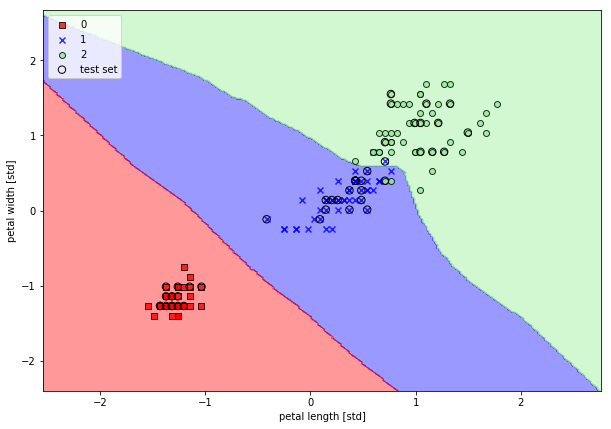

In [16]:
# teach a decision tree classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(X_train_std, y_train)

# predict test data
y_pred = knn.predict(X_test_std)
print('Accuracy of KNN: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = knn, test_idx = range(105, 150))
plt.xlabel('petal length [std]')
plt.ylabel('petal width [std]')
plt.legend(loc = 'upper left')
plt.show()